# Remove Response

In [1]:
import glob, os
from obspy import read, Stream, read_inventory
from obspy.core.trace import Stats
import matplotlib.pyplot as plt
%matplotlib inline 

### Get list of the folders

In [2]:
cwd = os.getcwd()

In [3]:
dirs = [ name for name in os.listdir(os.getcwd()) if os.path.isdir(os.path.join(os.getcwd(), name)) ]

### Remove unnecessary folder

In [4]:
dirs.remove('.ipynb_checkpoints')

### Get the list of the earhquake files inside in a folder (ends with .SAC)

In [5]:
sacs = glob.glob(dirs[2] + '/*.SAC')

## Read all sac files 

In [6]:
st_org = Stream()
for sac in sacs:
    st_org += read(sac,format='SAC')

### Get the list of the response files inside in a folder (starts with RESP.)

In [7]:
resps = glob.glob(dirs[2] + '/*RESP*')

In [8]:
inv = read_inventory()
for resp in resps:
    inv += read_inventory(resp)

In [9]:
st_rem_resp = st_org.copy()
st_rem_resp.attach_response(inv)    
st_rem_resp.remove_response(output="ACC", water_level=20)

3 Trace(s) in Stream:
AT.SDPT..BHZ | 2011-07-16T19:58:23.000000Z - 2011-07-16T20:04:23.000000Z | 50.0 Hz, 18001 samples
AT.SDPT..BHN | 2011-07-16T19:58:23.000000Z - 2011-07-16T20:04:23.000000Z | 50.0 Hz, 18001 samples
AT.SDPT..BHE | 2011-07-16T19:58:23.000000Z - 2011-07-16T20:04:23.000000Z | 50.0 Hz, 18001 samples

outputs can be:
ACC - Acceleration
VEL - Velocity
DISP - Displacement

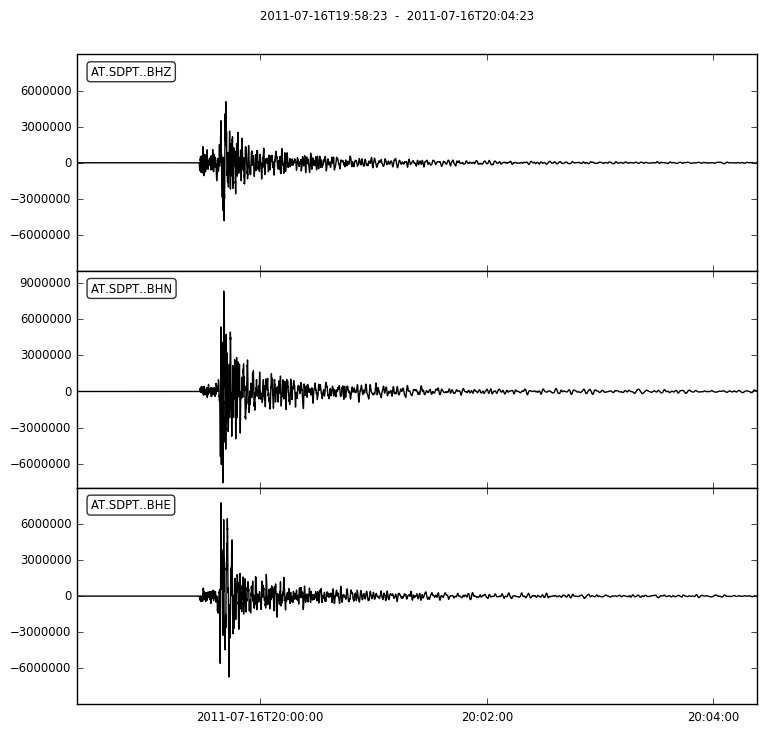

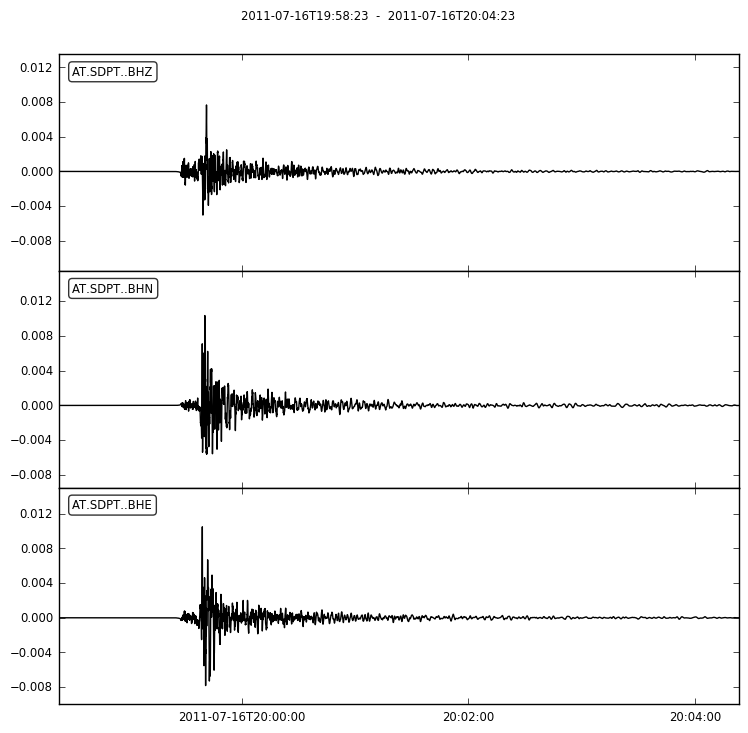

In [10]:
st_org.plot()
st_rem_resp.plot()